<a href="https://colab.research.google.com/github/ankit-verma2000/Hospital-analysis/blob/main/Apollo_hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apollo Hospitals**

# **About**
Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.
As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.

One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

---

## **Problem Statement** :

The company wants to know:

• Which variables are significant in predicting the reason for hospitalization for different regions.

• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges.

# Column Profiling

Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex: This is the policy holder's gender, either male or female

Viral Load: Viral load refers to the amount of virus in an infected person's blood

Severity Level: This is an integer indicating how severe the patient is

Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.

Region: This is the beneficiary's place of residence in Delhi, divided into
four geographic regions - northeast, southeast, southwest, or northwest

Hospitalization charges: Individual medical costs billed to health insurance

# Defining Problem Statement and Analysing basic metrics
> **Importing Libraries**

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency # For Chi-Sq

>**Importing the dataset**

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv")
data.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [3]:
df = data.copy()

>**Basic analysis**

In [4]:
df.shape

(1338, 8)

In [5]:
# Columns in dataframe:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'smoker', 'region', 'viral load',
       'severity level', 'hospitalization charges'],
      dtype='object')

In [6]:
# Data-type of all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [7]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1338.0,668.500000,386.391641,0.00,334.2500,668.50,1002.7500,1337.00
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.0000,64.00
viral load,1338.0,10.221233,2.032796,5.32,8.7625,10.13,11.5675,17.71
severity level,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.0000,5.00
hospitalization charges,1338.0,33176.058296,30275.029296,2805.00,11851.0000,23455.00,41599.5000,159426.00


In [8]:
# Statistical Summary of Object Columns
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


# Data Preprocessing:

In [9]:
# checking for missing value:
df.isna().sum()

,0
Unnamed: 0,0
age,0
sex,0
smoker,0
region,0
viral load,0
severity level,0
hospitalization charges,0


In [10]:
# Check for duplicated values:
df.duplicated().sum()

0

In [11]:
# Handling irrelevant features:
df.drop(columns = 'Unnamed: 0',inplace = True)
df.shape

(1338, 7)

In [12]:
# Making list for numerical and categorical data types:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if col not in num_cols]
print('Numerical Features:\n',num_cols)
print('Categorical Features:\n',cat_cols)

Numerical Features:
 ['age', 'viral load', 'severity level', 'hospitalization charges']
Categorical Features:
 ['sex', 'smoker', 'region']


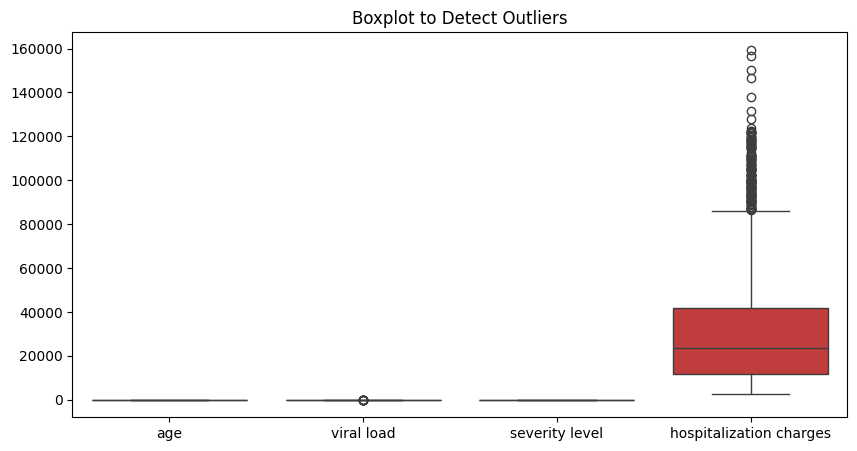

In [13]:
# Outlier detection:
# using box plot:
plt.figure(figsize = (10,5))
sns.boxplot(data = df)
plt.title("Boxplot to Detect Outliers")
plt.show()

In [14]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0

    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers from input data found"

In [15]:
for col in ["age","viral load","severity level","hospitalization charges"]:
    print(f'Column {col} has {detect_outliers(df[col])}')

Column age has 0.0 % Outliers from input data found
Column viral load has 0.0067 % Outliers from input data found
Column severity level has 0.4425 % Outliers from input data found
Column hospitalization charges has 0.1039 % Outliers from input data found


> Inference:
* outlier presence is not significant.
* all the columns have outliers less than 5%.

# Exploratory data analysis:
> ## Non-Graphical Analysis: Value counts and unique attributes

In [16]:
# Unique value:
#df.nunique()
for col in df.columns:
    print(f' {col} column has {df[col].nunique()} unique values')

 age column has 47 unique values
 sex column has 2 unique values
 smoker column has 2 unique values
 region column has 4 unique values
 viral load column has 462 unique values
 severity level column has 6 unique values
 hospitalization charges column has 1320 unique values


In [17]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [18]:
new_df = df.iloc[:,[0,1,2,3,5]]
new_df.head()

,age,sex,smoker,region,severity level
0,19,female,yes,southwest,0
1,18,male,no,southeast,1
2,28,male,no,southeast,3
3,33,male,no,northwest,0
4,32,male,no,northwest,0


In [19]:
# Value-Counts
for col in new_df.columns:
    value_count=df[col].value_counts(normalize=True)*100
    print(f"----Value counts of {col} column ---- ")
    print()
    print(value_count.round(2))
    print()

----Value counts of age column ---- 

age
18    5.16
19    5.08
50    2.17
51    2.17
47    2.17
46    2.17
45    2.17
20    2.17
48    2.17
52    2.17
22    2.09
49    2.09
54    2.09
53    2.09
21    2.09
26    2.09
24    2.09
25    2.09
28    2.09
27    2.09
23    2.09
43    2.02
29    2.02
30    2.02
41    2.02
42    2.02
44    2.02
31    2.02
40    2.02
32    1.94
33    1.94
56    1.94
34    1.94
55    1.94
57    1.94
37    1.87
59    1.87
58    1.87
36    1.87
38    1.87
35    1.87
39    1.87
61    1.72
60    1.72
63    1.72
62    1.72
64    1.64
Name: proportion, dtype: float64

----Value counts of sex column ---- 

sex
male      50.52
female    49.48
Name: proportion, dtype: float64

----Value counts of smoker column ---- 

smoker
no     79.52
yes    20.48
Name: proportion, dtype: float64

----Value counts of region column ---- 

region
southeast    27.20
southwest    24.29
northwest    24.29
northeast    24.22
Name: proportion, dtype: float64

----Value counts of severity leve

> ## **Graphical Analysis**

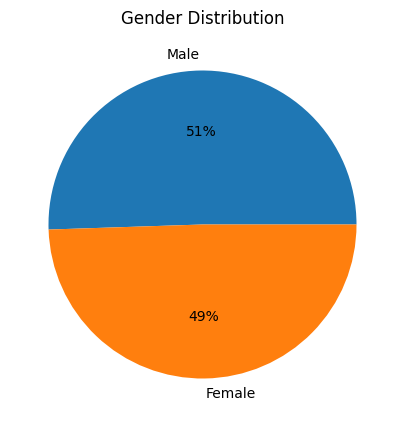

In [20]:
# Univariate analysis:
plt.figure(figsize=(10,5))
plt.pie(df['sex'].value_counts(),labels=['Male','Female'], autopct='%.0f%%')
plt.title('Gender Distribution')
plt.show()

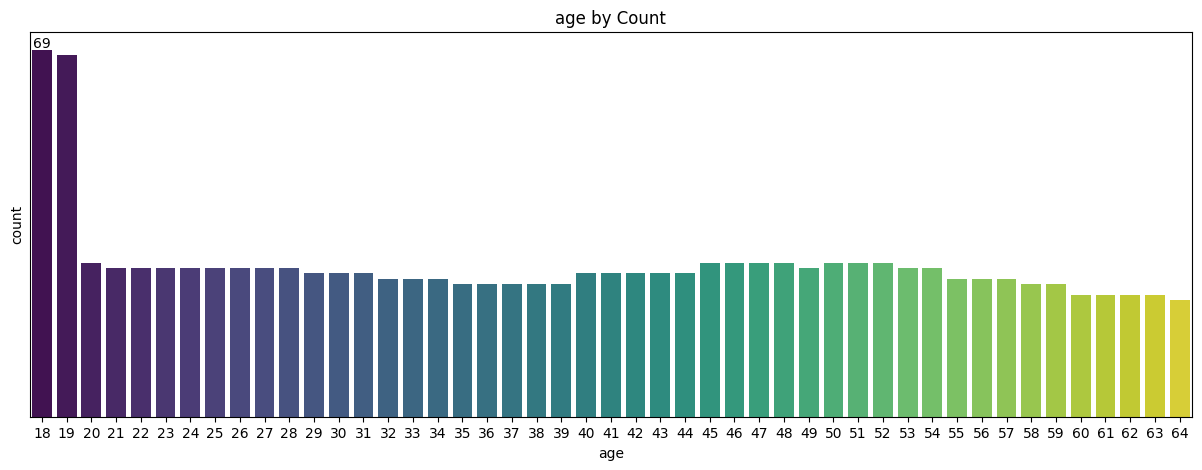

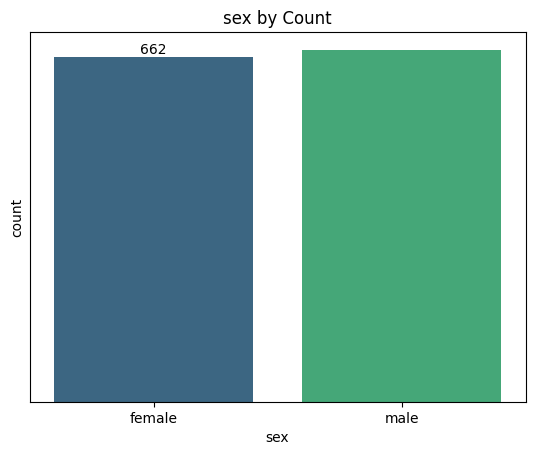

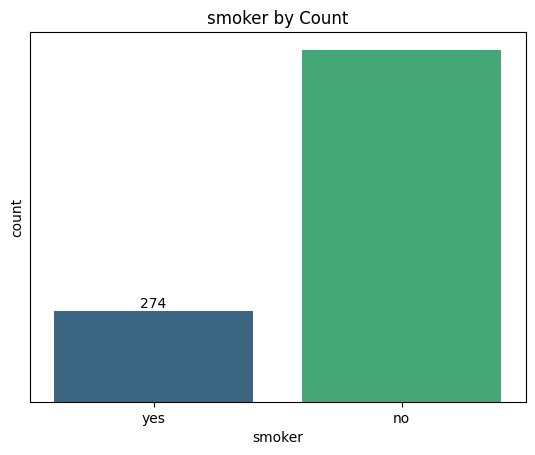

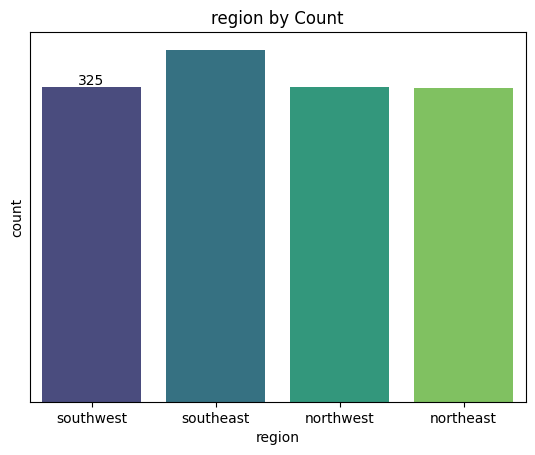

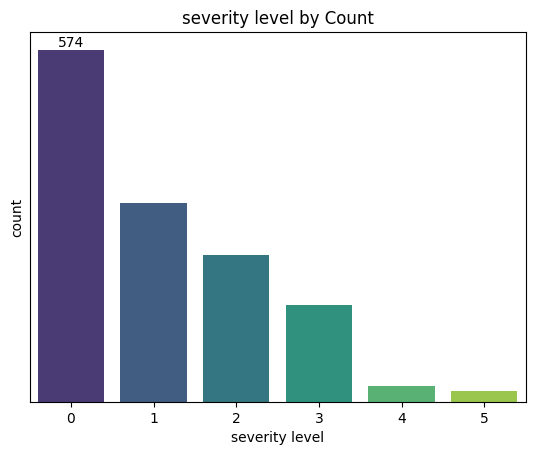

In [21]:
# Countplot of attributes
plt.figure(figsize=(15, 5))
for col in new_df.columns:
    ax = sns.countplot(data = new_df, x=col,palette="viridis")
    plt.title(f"{col} by Count")
    # Add labels to each bar
    ax.bar_label(ax.containers[0], label_type='edge')
    plt.yticks([])  # Display values on top of bars
    plt.show()
    print()

> Inference:
* The gender distribution is almost the same.
* For the Age 18 & 19 have more patients and the rest of the ages have approx equal distribution.
* Interestingly Non-Smoker patients count is more than the Smokers count
* Southeast region has more patients and the rest of the regions have equal distribution
* From plot we observe that ther were less number of patients with 'Severity Level' high.

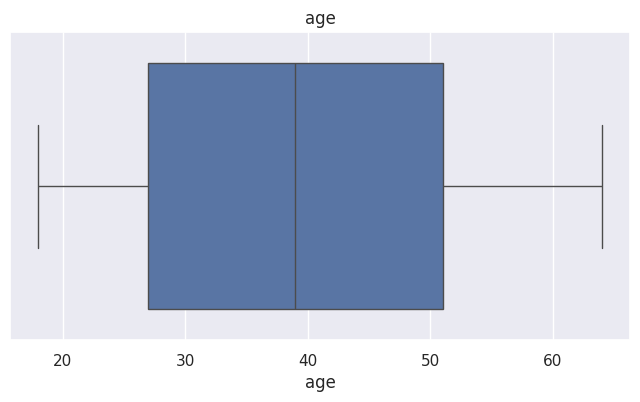

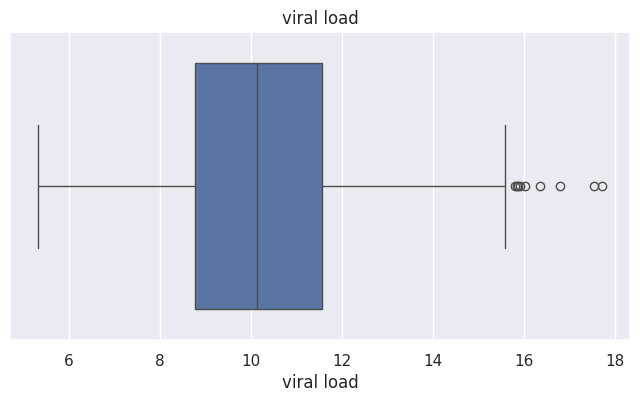

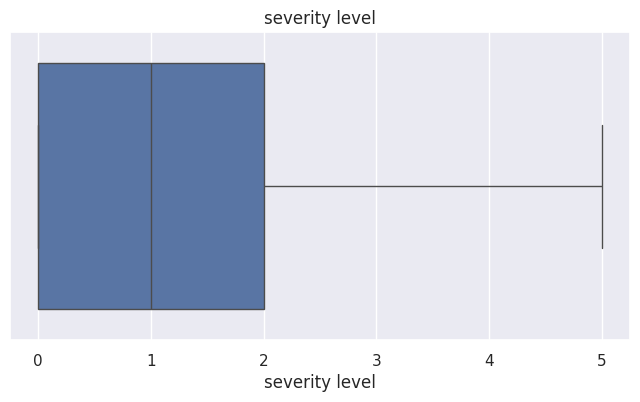

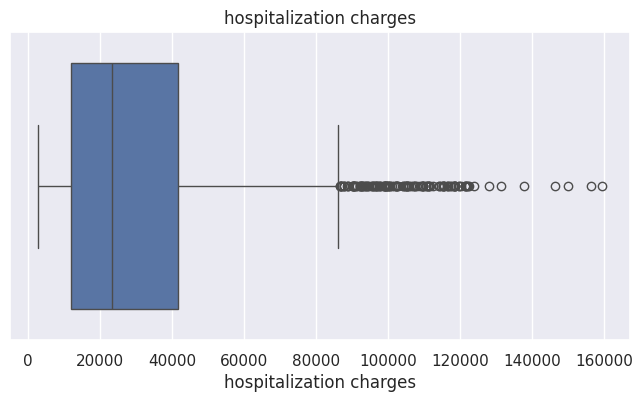

In [22]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8,4)})
#plt.figure(figsize=(10,5))
for col in num_cols:
  p = sns.boxplot(data = df, x = col)
  p.set(title=f'{col}')
  plt.show()

> Infernece:
* The above plot indicate that we have outliers only for for 'viral load' and 'hospitalization charges' Features.

In [23]:
# outliers detection:
def outlier_analysis(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    max_excluding_outlier = Q3 + 1.5 * IQR
    min_excluding_outlier = Q1 - 1.5 * IQR

    mean = round(df[column].mean(), 2)
    median = round(df[column].median(), 2)
    mode = df[column].mode()
    mode_values = list(mode.round(2)) if not mode.empty else 'No mode'

    print(f"Outlier Analysis for {column}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode_values}")
    print(f"IQR: {IQR}")
    print(f"Max Excluding Outlier: {max_excluding_outlier}")
    print(f"Min Excluding Outlier: {min_excluding_outlier}")


In [24]:
# outlier analysis of 'viral load'
print(outlier_analysis(df,'viral load'))
print()
print(outlier_analysis(df,'hospitalization charges'))

Outlier Analysis for viral load:
Mean: 10.22
Median: 10.13
Mode: [9.63, 10.77]
IQR: 2.8050000000000015
Max Excluding Outlier: 15.775000000000002
Min Excluding Outlier: 4.554999999999997
None

Outlier Analysis for hospitalization charges:
Mean: 33176.06
Median: 23455.0
Mode: [4055, 4080, 4099, 4319, 4593, 5509, 5544, 6773, 11799, 16501, 20836, 23618, 26486, 26504, 33677, 35003, 35986, 62288]
IQR: 29748.5
Max Excluding Outlier: 86222.25
Min Excluding Outlier: -32771.75
None


In [25]:
# Outlier Treatment
# Remove the columns from the Numerical Features list where we don't have any outliers
num_cols = [feature for feature in num_cols if feature not in {'age', 'severity level'}]
print(num_cols)

['viral load', 'hospitalization charges']


In [26]:
# Treat outliers for the numerical features where outliiers present
# for i, j in enumerate(num_cols):
#   q1 = work_df[j].quantile(0.25)
#   q3 = work_df[j].quantile(0.75)
#   iqr = q3 - q1
#   work_df = work_df[(work_df[j] >=  q1 - 1.5*iqr) & (work_df[j] <= q3 + 1.5*iqr)]

In [27]:
# Calculate IQR for all numerical columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers in one step using .loc[]
df = df[np.logical_and.reduce([
    df[col].between(Q1[col] - 1.5 * IQR[col], Q3[col] + 1.5 * IQR[col])
    for col in num_cols
])]


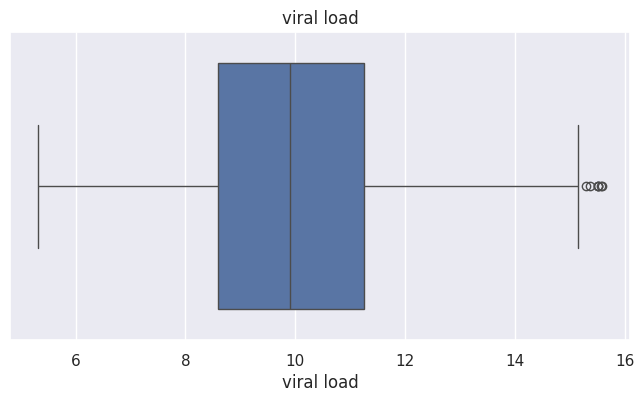

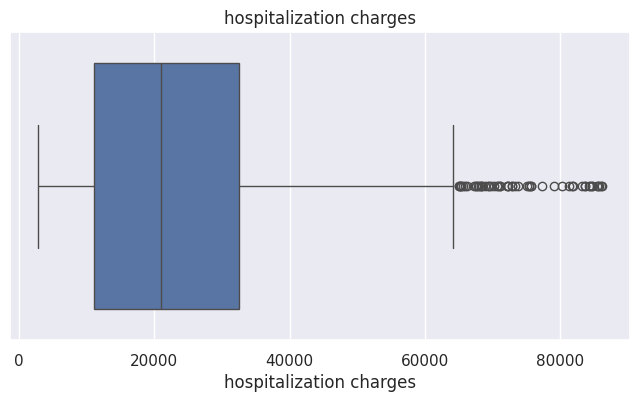

In [28]:
 # Post outlier treatment
for col in num_cols:
  p = sns.boxplot(data=df,x=col)
  p.set(title=f'{col}')
  plt.show()

In [29]:
df['age_bins'] = pd.cut(x = df['age'],
                        bins = [0, 18, 35, 50, 70, 100],
                        labels = ['0-18', '18-35', '35-50', '50-70', '70-100'])
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-35
1,18,male,no,southeast,11.26,1,4314,0-18
2,28,male,no,southeast,11.00,3,11124,18-35
3,33,male,no,northwest,7.57,0,54961,18-35
4,32,male,no,northwest,9.63,0,9667,18-35


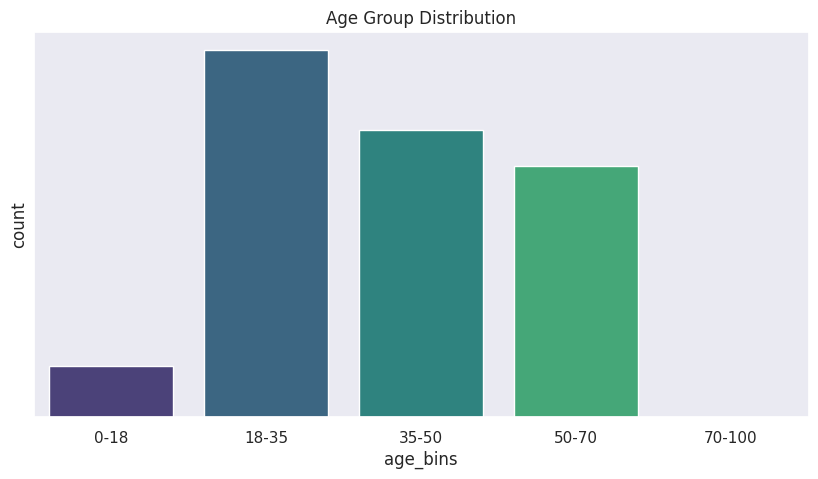

In [30]:
# Count plot for different age group:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'age_bins', palette = 'viridis')
plt.title('Age Group Distribution')
plt.yticks([])
plt.show()

## **Bivariate Analysis**

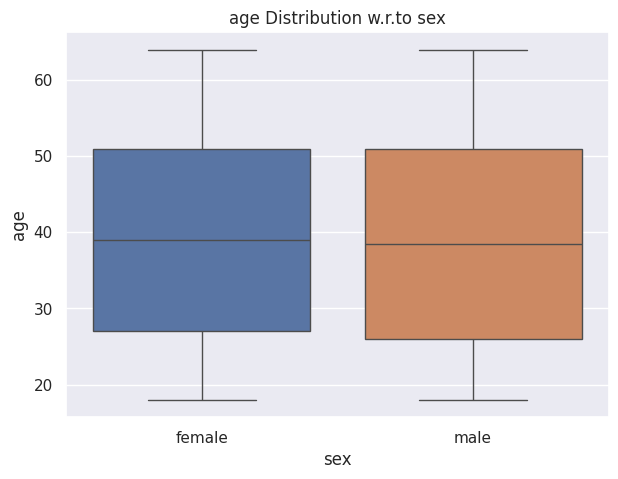

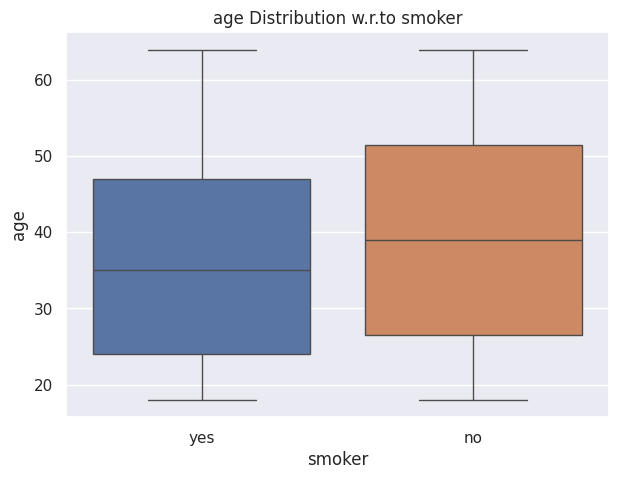

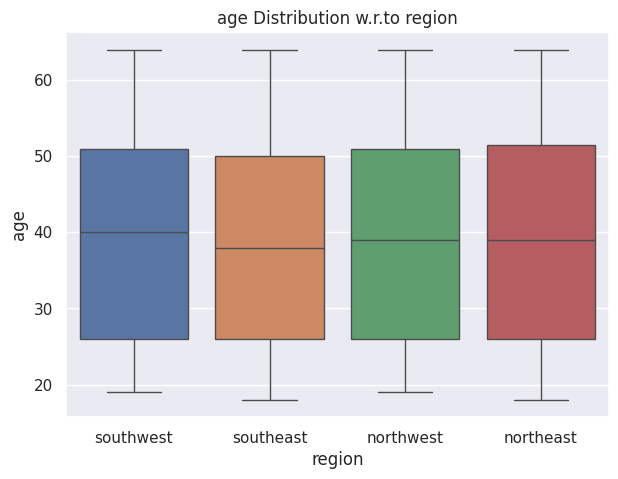

In [31]:
# Bi-variate analysis of Categorical Features
variable = "age"
for i in cat_cols:
 plt.figure(figsize = (7,5))
 sns.boxplot(x=i, hue=i, y=variable, data = df, dodge=False)
 plt.title(variable + " Distribution w.r.to " + i)
 plt.show()

> Inference:
* Most of the patients are seem to be b/w the ages 28 to 52 and
equally distributed b/w both the gender Similarly irrespective of smoking habit, the patients seem to be highly distributed b/w 28 and 50 ages Similar
distribution observed across the regions.

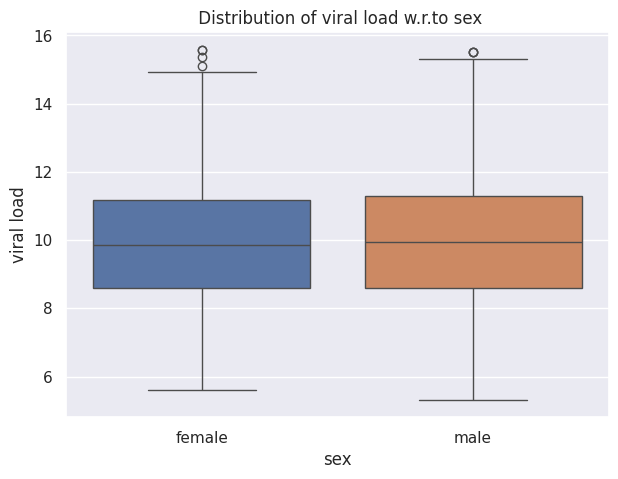

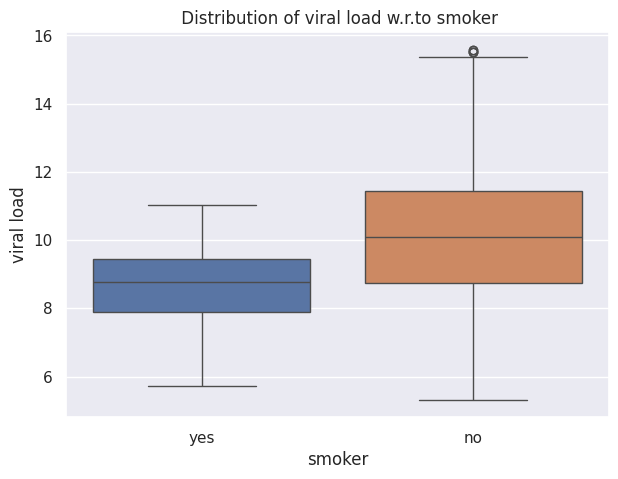

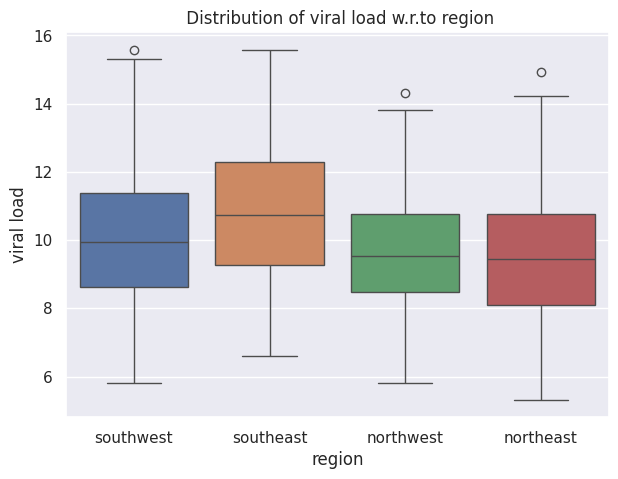

In [32]:
variable = "viral load"
for i in cat_cols:
 plt.figure(figsize = (7,5))
 sns.boxplot(x=i, hue=i, y=variable, data = df, dodge=False)
 plt.title(f" Distribution of {variable} w.r.to {i}")
 plt.show()

> Inference:
* Female patients seems to be little more vulnerable to viral load than Male patients
* Incidently non-smokers tend to have high viral load than smokers
* Amongst the regions, Southeast is impacted with high viral load than other regions



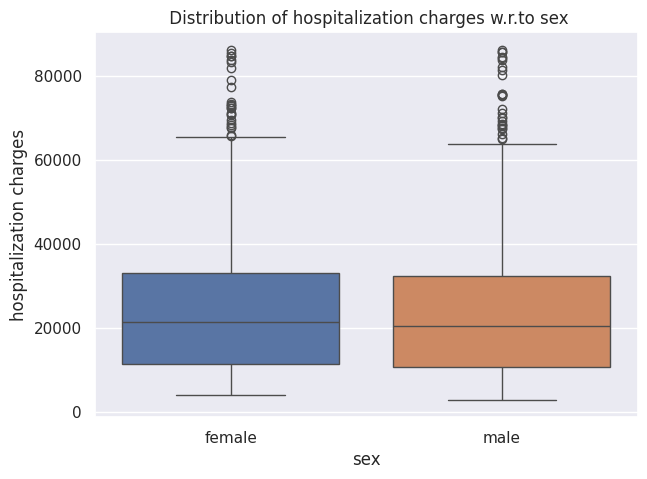

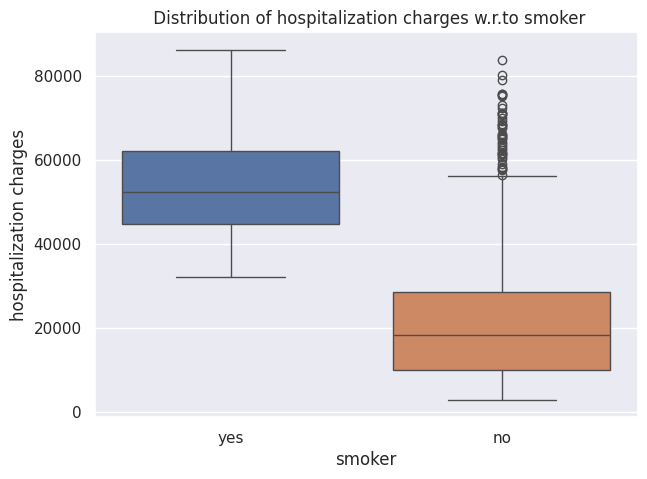

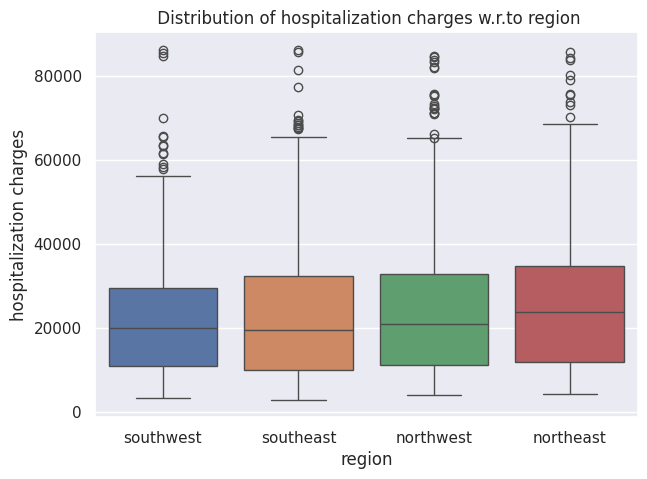

In [33]:
variable = "hospitalization charges"
for i in cat_cols:
 plt.figure(figsize = (7,5))
 sns.boxplot(x=i, hue=i, y=variable, data = df, dodge=False)
 plt.title(f" Distribution of {variable} w.r.to {i}")
 plt.show()

> Inference:
* Male patients tend to incur high charges
* Evidently Smokers are paying more than the non-smokers
* Southeast region has higher hospitalization charges amongst regions

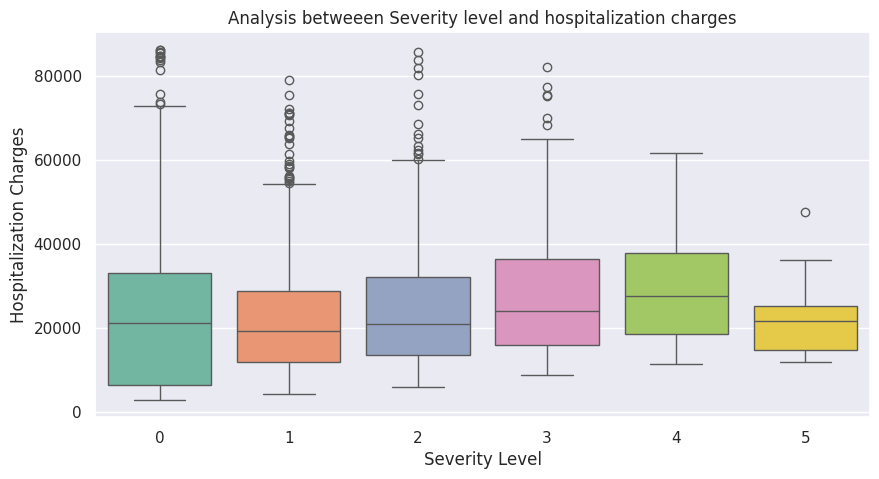

In [34]:
# Impact of Severity Level on Hospitalization Charges
plt.figure(figsize = (10,5))
sns.boxplot(x='severity level', y='hospitalization charges', data=df, dodge=False,palette=sns.color_palette("Set2"))
plt.xlabel("Severity Level")
plt.ylabel("Hospitalization Charges")
plt.title(f"Analysis betweeen Severity level and hospitalization charges")
plt.show()


Severity Levels 0, 3 and 4 seem to have higher hospitalization charges

In [35]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-35
1,18,male,no,southeast,11.26,1,4314,0-18
2,28,male,no,southeast,11.00,3,11124,18-35
3,33,male,no,northwest,7.57,0,54961,18-35
4,32,male,no,northwest,9.63,0,9667,18-35


## **Multivariate analysis:**

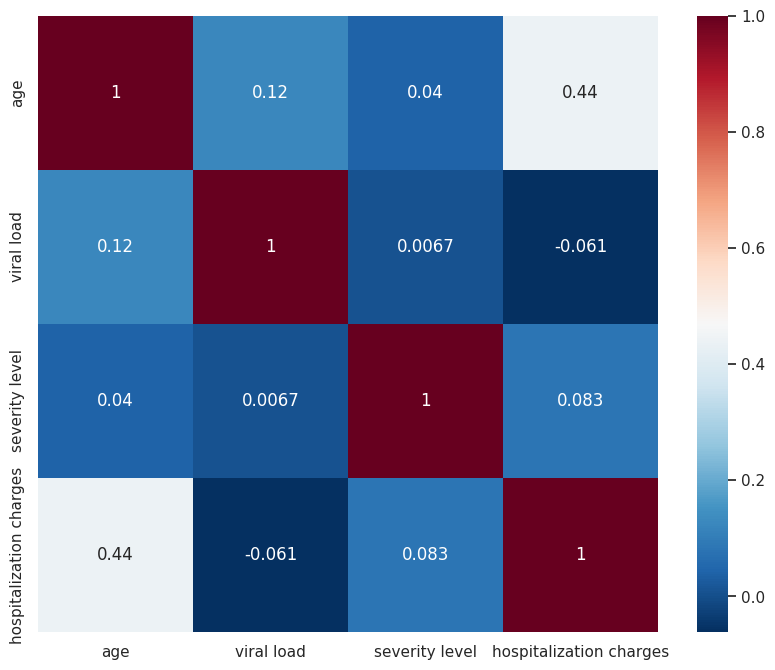

In [36]:
corr_data = df[['age','viral load','severity level','hospitalization charges']]
# Check for Correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr_data.corr(), annot=True, cmap='RdBu_r')
plt.show()

> Inference:
* Notably, there is a high correlatioin between Age & Hospitalization Charges

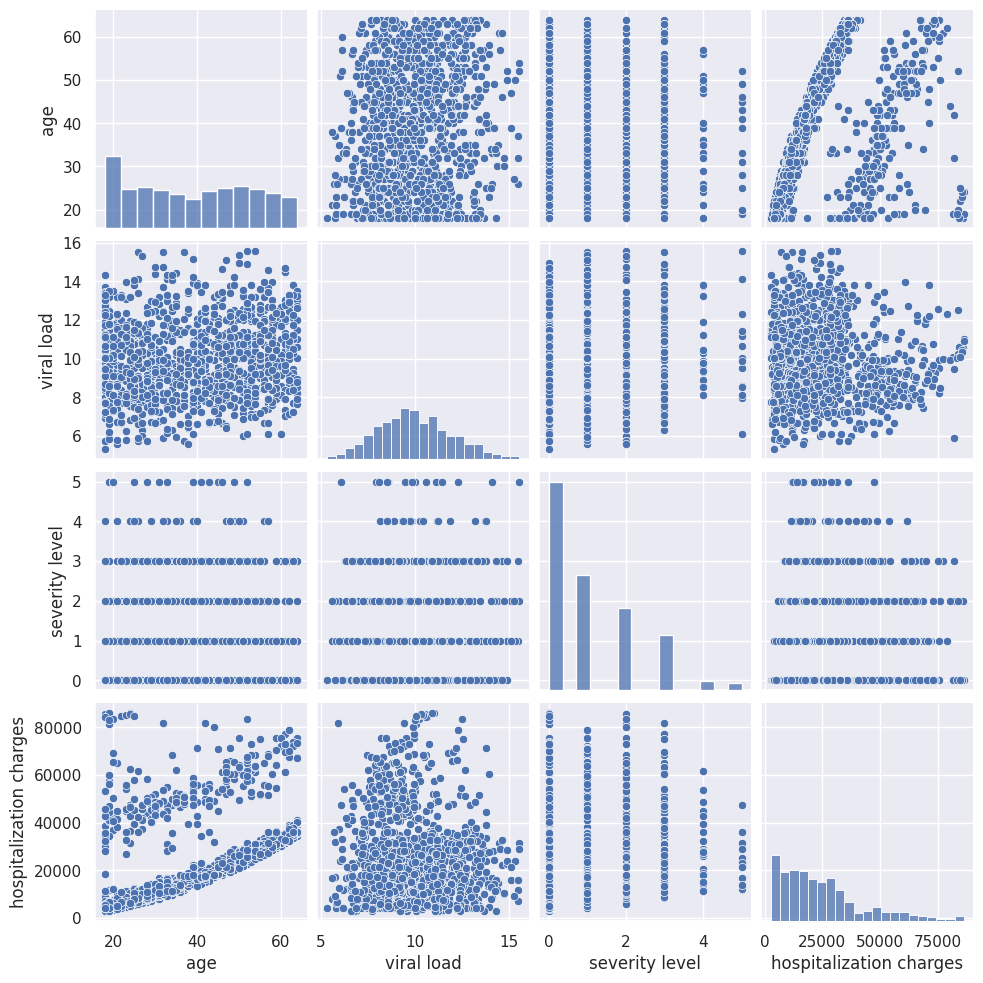

In [37]:
# Plot the pair plot
sns.pairplot(df)
plt.show()

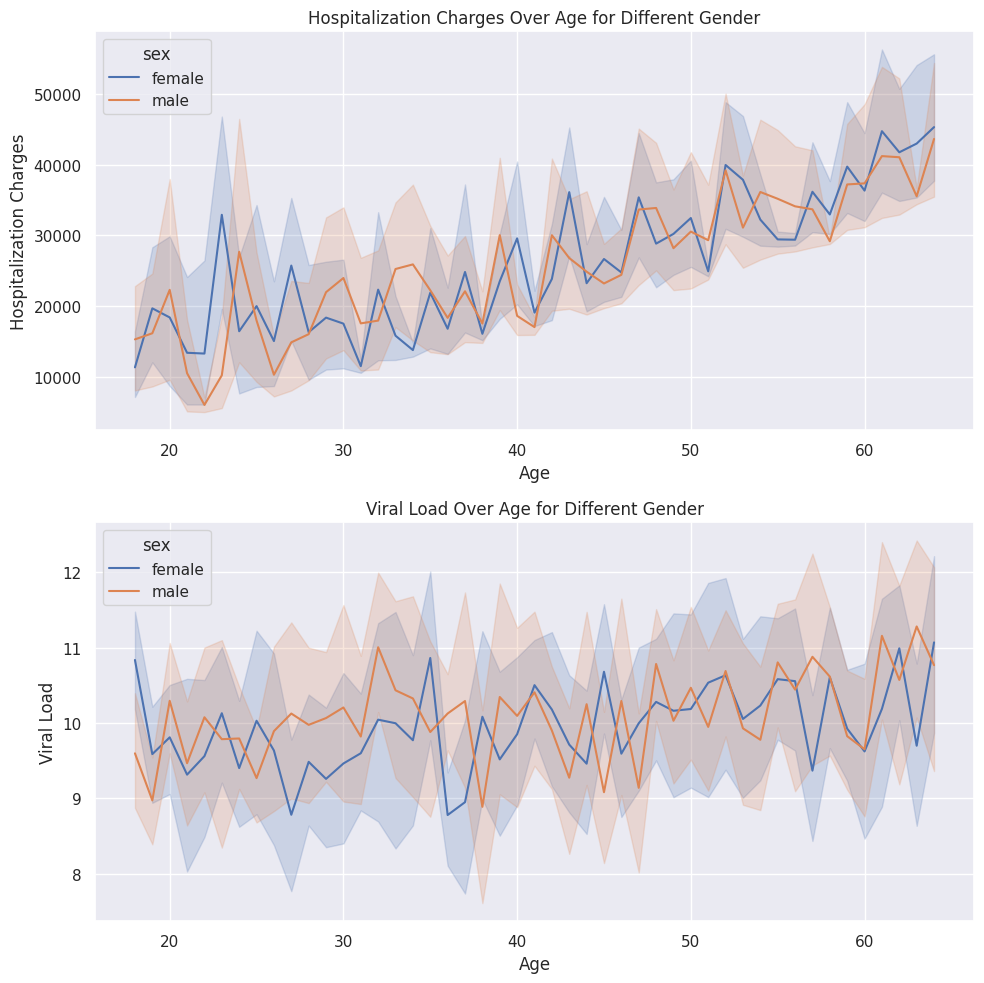

In [38]:
# Plot line graph with respest to gender:

plt.figure(figsize=(10,10))
plt.subplot(211)
sns.lineplot(x='age', y='hospitalization charges', data=df, hue='sex')
plt.xlabel('Age')
plt.ylabel('Hospitalization Charges')
plt.title('Hospitalization Charges Over Age for Different Gender')

plt.subplot(212)
sns.lineplot(x='age', y='viral load', data=df, hue='sex')
plt.xlabel('Age')
plt.ylabel('Viral Load')
plt.title('Viral Load Over Age for Different Gender')

plt.tight_layout()
plt.show()

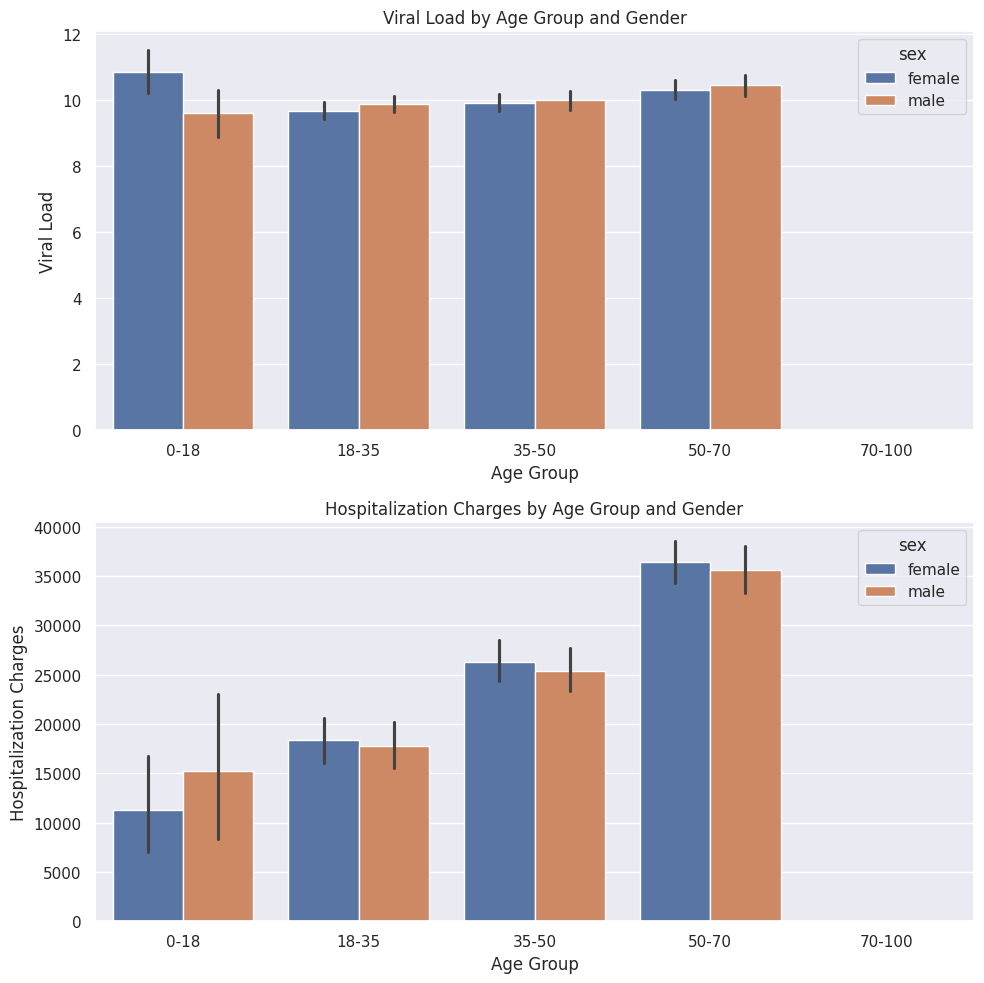

In [39]:
# barplot:
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.barplot(x='age_bins', y='viral load', data=df, hue='sex')
plt.xlabel('Age Group')
plt.ylabel('Viral Load')
plt.title('Viral Load by Age Group and Gender')

plt.subplot(212)
sns.barplot(x='age_bins', y='hospitalization charges', data=df, hue='sex')
plt.xlabel('Age Group')
plt.ylabel('Hospitalization Charges')
plt.title('Hospitalization Charges by Age Group and Gender')

plt.tight_layout()
plt.show()

> Inferences:
* The viral load is sigificantly same for all the age group and witin gender.
* It is evident from the above graphs that hospitalization charges increase with the age and that too in women segment.

# **Hypothesis Testing**

## Analyze that the hospitalization charges for people who do smoking is greater than those who don't? (T-test Right tailed)

In [40]:
# # Hypothesis 1 - Hospitalization charges of people who are smokers is greater than the non-smokers
df.groupby('smoker')['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1055.0,20907.971564,14563.067125,2805.0,9962.5,18313.0,28387.5,83680.0
yes,138.0,55035.586957,13792.707698,32074.0,44784.5,52197.0,62048.5,86182.0


> **Formulate the null and alternate hypothesis:**

* Null Hypothesis : The Mean Hospitalization charges for Smokers (m1) = the Mean Hospitalization charges of nonsmokers (m2)

* Alternate Hypothesis: m1 > m2 (The average hospitalization charges of smokers is greater than that of nonsmokers)

* Decide the significance level. If P values is less than alpha, then 'fail to accept' the null hypothesis.
* Assuming alpha to be 0.05(95% confidence)

Let's do a T-stat test. The > sign in alternate hypothesis indicate test is right tailed, which means all z values that would reject null hypothesis are in just one tail to the right of sampling distribution curve.

In [41]:
df.shape

(1193, 8)

In [42]:
# Creating smoker and non-smoker samples.
smokers_sample = df[df['smoker'] == 'yes']['hospitalization charges'].sample(400,replace = True)
non_smokers_sample = df[df['smoker'] == 'no']['hospitalization charges'].sample(400,replace = True)

In [43]:
from re import M
# mean of smokers and non-smokers:
m1 = smokers_sample.mean()
m2 = non_smokers_sample.mean()
print(f"Mean of smokers: {round(m1,2)}")
print(f"Mean of non-smokers: {round(m2,2)}")

Mean of smokers: 54234.94
Mean of non-smokers: 21017.02


In [52]:
# If mean1 is > mean2 then alternate value is 'greater' else it is 'less' else if mean1 equal to mean2 then the value is 'two-sided'
alpha = 0.05
alt_val = ["greater" if m1>m2 else 'two-sided' if m1==m2 else "less"]

t_stat, p_val = stats.ttest_ind(smokers_sample, non_smokers_sample, equal_var=False, alternative=alt_val[0])
p_val_onetail = p_val/2
print("Test Statistic = {}, P-Value = {}, One Tail P-Value = {}".format(t_stat, p_val, p_val_onetail))
if p_val < alpha:
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")


Test Statistic = 34.4114673283694, P-Value = 7.57299823029846e-160, One Tail P-Value = 3.78649911514923e-160
We reject the null hypothesis


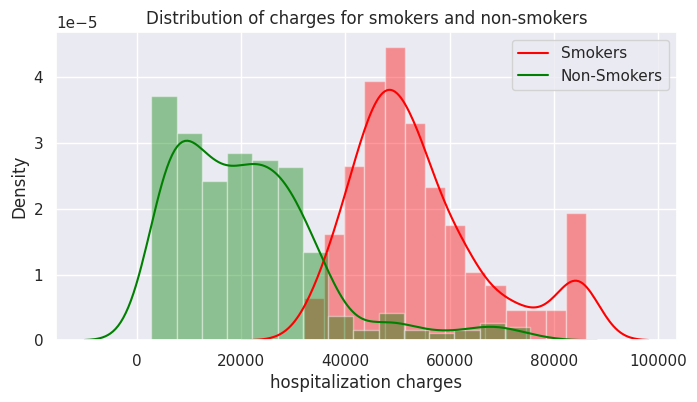

In [46]:
# Ploting:
sns.distplot(smokers_sample, color='red')
sns.distplot(non_smokers_sample, color='green')
plt.title('Distribution of charges for smokers and non-smokers')
plt.legend(['Smokers', 'Non-Smokers'])
plt.show()

## Analyze with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

Overview:


---


Null Hypothesis (H₀): There is no difference between the viral load of females and males.
This can be stated as: "The mean viral load of females is equal to the mean viral load of males."

Alternate Hypothesis (H₁ or Ha): There is a difference between the viral load of females and males.

This can be stated as: "The mean viral load of females is not equal to the mean viral load of males."

Decide the significance level. If P values is less than alpha, then we reject our null hypothesis.

In [47]:
df.groupby('sex')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,611.0,9.968298,1.968264,5.60,8.5900,9.86,11.165,15.58
male,582.0,10.032440,1.943610,5.32,8.6025,9.94,11.285,15.51


In [49]:
male_sample = df[df['sex']=='male']['viral load'].sample(500)
female_sample = df[df['sex']=='female']['viral load'].sample(500)

male_mean = male_sample.mean()
print('Male Mean:', male_mean)
female_mean = female_sample.mean()
print('Female Mean:', female_mean)

Male Mean: 10.04644
Female Mean: 9.9347


In [50]:
# As the means of both the samples of male and female, let's do 'two-sided'.
alpha = 0.05
t_stat, p_val = stats.ttest_ind(male_sample, female_sample)
print("Test Statistic = {}, P-Value = {}".format(t_stat, p_val))
if p_val < alpha:
  print("We reject our null hypothesis")
else:
  print("We fail to reject the null hypothesis")

Test Statistic = 0.9140339706800633, P-Value = 0.36091976433291406
We fail to reject the null hypothesis


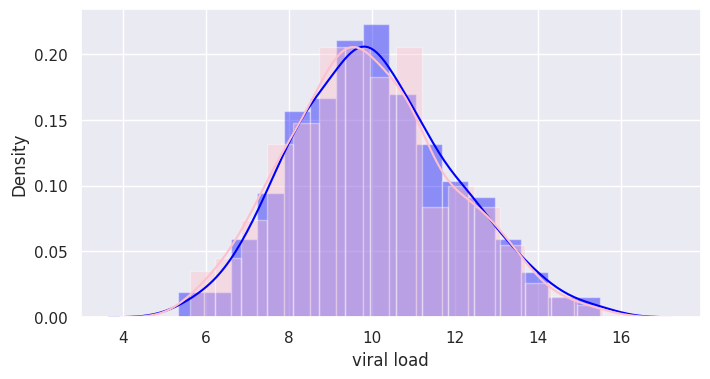

In [51]:
sns.distplot(male_sample, color='blue')
sns.distplot(female_sample, color='pink')
plt.show()

> inference:

So, to summarize:

Null Hypothesis (H₀): The viral load of females is the same as that of males.

Alternate Hypothesis (Ha): The viral load of females is different from that of males.

Thus, The viral load of females is the same as that of males

## Chi-Squared Test:

Is the proportion of smoking significantly different across different regions? (Chi-square)

- Both Smoker and Region are categorical variables

* Null Hypothesis : Smokers proportions is same across all regions

* Alternate Hypothesis: Smokers proportions is different across different regions

* If P values is less than alpha, then reject our null hypothesis
'fail to accept' the null hypothesis.

In [53]:
contingency = pd.crosstab(df.region, df.smoker)
contingency

smoker,no,yes
region,,
northeast,256,39
northwest,267,38
southeast,267,35
southwest,265,26


In [54]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction=False)
print("Chi Square Statistic: {}, P-Value: {}, Degree of Freedom: {}, Expected Frequency: {}".format(chi2, p_val, dof, exp_freq))
if p_val < alpha:
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")


Chi Square Statistic: 2.99680663546149, P-Value: 0.39211779235957156, Degree of Freedom: 3, Expected Frequency: [[260.875943    34.124057  ]
 [269.71919531  35.28080469]
 [267.06621961  34.93378039]
 [257.33864208  33.66135792]]
We fail to reject the null hypothesis


## ANOVA Test

- Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?

- Explain your answer with statistical evidence (One way Anova)

* Null Hypothesis : The mean viral load of women with no severity level μ1, one severity level μ2 and two severity level μ3 are the same.

Alternate Hypothesis: μ1 or μ2 or μ3 may not be same.

If P values is less than alpha, then reject the null hypothesis.

In [56]:
female_severity_df = df[df['sex']=='female'].loc[df[df['sex']=='female']['severity level']<=2]
female_severity_df.head()


,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-35
5,31,female,no,southeast,8.58,0,9392,18-35
6,46,female,no,southeast,11.15,1,20601,35-50
9,60,female,no,northwest,8.61,0,72308,50-70
11,62,female,yes,southeast,8.76,0,69522,50-70


In [60]:
# Shapiro-Wilk’s test - Let's test
# null hypothesis: viral load follows normal distribution against the
# alternative hypothesis: viral load doesn't follow normal distribution

print('For normal female severity df')
w, p_val = shapiro(female_severity_df['viral load'])
print("P-Value is: ", p_val)
if p_val < alpha:
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")
print()
print('Using log on the female severity df')
w, p_val = shapiro(np.log(female_severity_df['viral load']))
print("P-Value is: ", p_val)
if p_val < alpha:
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

For normal female severity df
P-Value is:  0.007534567223142948
We reject the null hypothesis

Using log on the female severity df
P-Value is:  0.00925794654507452
We reject the null hypothesis


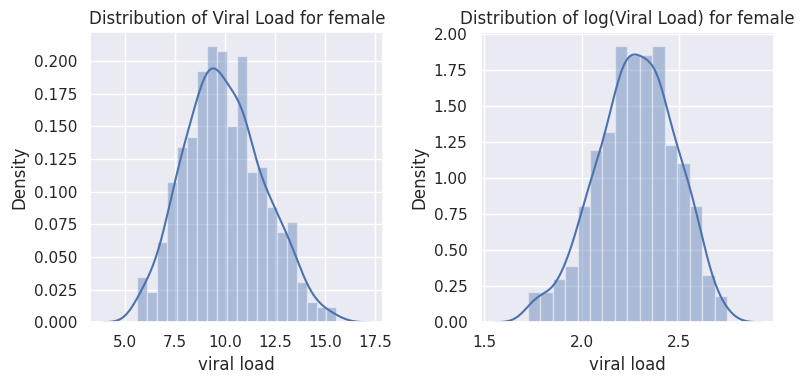

In [63]:
plt.subplot(121)
sns.distplot(female_severity_df['viral load'], bins=20)
plt.title('Distribution of Viral Load for female')
plt.subplot(122)
sns.distplot(np.log(female_severity_df['viral load']))
plt.title('Distribution of log(Viral Load) for female')
plt.tight_layout()
plt.show()

> Inference:
Even the log normal test fails the Ho, which means the distribution is not normal


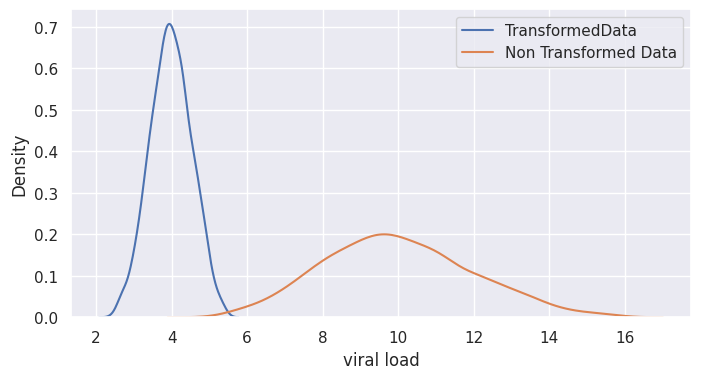

In [64]:

transformed_data, best_lambda = stats.boxcox(df['viral load'])
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData")
sns.distplot(df['viral load'], hist=False, kde=True, label = "Non Transformed Data")
plt.legend()
plt.show()

In [65]:
tstat, p_val = stats.shapiro(transformed_data)
print('P-Value is: ', p_val)
if p_val < alpha:
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

P-Value is:  0.04065118902222119
We reject the null hypothesis


## Levene’s test

Null hypothesis : All the viral load variances are equal

Alternative hypothesis : At least one variance is different from the rest.

In [66]:
# Levene's test
statistics, p_val = levene(female_severity_df[female_severity_df['severity level']==0]['viral load'].sample(100),
                           female_severity_df[female_severity_df['severity level']==1]['viral load'].sample(100),
                           female_severity_df[female_severity_df['severity level']==2]['viral load'].sample(100, replace=True))
print('P-Value is: ', p_val)
if p_val < alpha:
  print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")


P-Value is:  0.0697444090721353
We fail to reject the null hypothesis


In [67]:
test_stat, p_val = f_oneway(female_severity_df[female_severity_df['severity level']==0]['viral load'].sample(100),
                            female_severity_df[female_severity_df['severity level']==1]['viral load'].sample(100),
                            female_severity_df[female_severity_df['severity level']==2]['viral load'].sample(100, replace=True))
print('P-Value is: ', p_val)
if p_val < alpha:
  print("Wereject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

P-Value is:  0.15904514349843415
We fail to reject the null hypothesis


> inference:

P-Value is high, thus Null Hypothesis is true, indicating Means are equal for all severity levels.

# Observations & Insights:

* There is no missing or duplicate value in the given dataset
* Age 18 & 19 have more patients and the rest of the ages have equal distribution
* Good to see less number of patients with 'Severity Level' high
* There are outliers in 'viral load' and 'hospitalization charges' columns
* There is a high correlatioin b/w Age & Hospitalization Charges. As the age increases, hospitalization charges also increases
* Interestingly Non-Smoker patients count is more than the Smokers count
* Southeast region has more patients and the rest of the regions have equal distribution
* Evidently Smokers are paying more than the non-smokers
* Also, hospitalization seem to increase with the age, and more specifically for women
* Female patients seems to be little more vulnerable to viral load than Male patients
* Incidently non-smokers tend to have high viral load than smokers
* Amongst regions, Southeast is impacted high viral load than other regions
* Male patients tend to incur high charges
* Southeast region has higher hospitalization charges amongst regions
* Hospitalization charges increase with age and that too in women segment

-----
> ## Observations from Hypothesis Testing:

- Hospitalization Charges for smokers is higher than for non-smokers
- Viral Load in Females is more compared to Males
- Proportion of smoking is almost similar across the regions
- Viral Load of women with Severity levels - 0,1,2 are more or less same

> ## Recommendations:

Based on the above observations and insights, some of the recommendations to consider are:

* It is alarming to see high number of patients at lower age group 18-20. It's high time to role out stable nutrition programs for children & teens.
* Notably Southeast region is impacted with high viral load and increased hospitalization charges. Special attention needs to be given in this region
* As age has direct proportion to the increased hospitalization charges, Apollo can come up with targeted healthcare policy & programs for higher age groups
* Female gender group requires specific, focused attention
Special medi-claim policy can be launced for Smokers.